# Week 4: 4.2 Exercise: Probability Mass Functions and Cumulative Distribution Functions


##### File: RattanavilayThip_Exercises_4.2
##### Name: Thip Rattanavilay
##### Date: 01/9/2021
##### Course: DSC 530 Data Exploration and Analysis
##### Assignment: Exercises Chapter 3: 3.1, 3.2
##### Assignment: Exercises Chapter 4: 4.1, 4.2

In [36]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from empyrical_dist import Pmf
from empyrical_dist import Cdf
import nsfg
import thinkstats2


# Chapter 3



### Exercise 3.1

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.



In [20]:
# read in the NSFG data
resp = nsfg.ReadFemResp()

# select the numkdhh col for pmf
pmf = Pmf.from_seq(resp.numkdhh)
pmf




,probs
0,0.466178
1,0.214052
2,0.196258
3,0.087139
4,0.025644
5,0.010729


### Get the biased numkdhh data




In [21]:
""" Function based off book but modified to fit the 
empyrical_dist library, which uses pandas methods

.qs = index
.ps = probabilities
"""
def BiasPmf(pmf):
    new_pmf = pmf.copy()

    for x, p in pmf.items():
        new_pmf[x] = new_pmf.get(x, 0) * x
        
    new_pmf.normalize()
    return new_pmf


In [22]:
# set the biased data
biased = BiasPmf(pmf)
biased




,probs
0,0.000000
1,0.208993
2,0.383240
3,0.255238
4,0.100153
5,0.052376


### Plot the data



Text(0, 0.5, 'PMF')

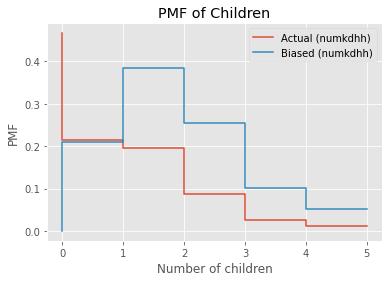

In [23]:
# plot the PMF data 
plt.style.use("ggplot")
plt.step(pmf.qs, pmf.ps, label="Actual (numkdhh)")
plt.step(biased.qs, biased.ps, label="Biased (numkdhh)")

# add labels
plt.title("PMF of Children")
plt.legend()
plt.xlabel("Number of children")
plt.ylabel("PMF")

### Get the means()



In [24]:
print("The actual data's mean is: {:.2f}".format(pmf.mean()))
print("The biased data's mean is: {:.2f}".format(biased.mean()))


The actual data's mean is: 1.02
The biased data's mean is: 2.40


## Exercise 3.2



### Get book values to compare mean and var



In [25]:
book_pmf = thinkstats2.Pmf(resp.numkdhh)
print("The mean from the Pmf function is {:.2f}".format(book_pmf.Mean()))
print("The var from the Pmf function is {:.2f}".format(book_pmf.Var()))

The mean from the Pmf function is 1.02
The var from the Pmf function is 1.41


In [26]:
# create mean function
def PmfMean(pmf):
    """ Function takes a pmf and computes the mean.

    @param: pmf (pmf obj (dict)) - pmf series

    returns:
    @param: mean (float) - mean of pmf
    """
    mean = 0.0
    mean = sum(p * x for x, p in pmf.d.items())

    return mean

# create var function
def PmfVar(pmf):
    """ Function takes a pmf and computes the variance.

    @param: pmf (pmf obj (dict)) - pmf series

    returns:
    @param: var (float) - variance of pmf
    """
    mean = PmfMean(pmf)
    var = 0
    var = sum(p * (x - mean)**2 for x, p in pmf.d.items())

    return var


In [27]:
# check PmfMean and PmfVar
print("The mean from the PmfMean function is {:.2f}".format(PmfMean(book_pmf)))
print("The var from the PmfVar function is {:.2f}".format(PmfVar(book_pmf)))




The mean from the PmfMean function is 1.02
The var from the PmfVar function is 1.41


# Chapter 4



## Exercise 4.1

How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

I have weighted at 91 pounds, and 87 ounces, I called my mother to apologized.

In [32]:
# read in the other babies data
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
others = live[live.birthord != 1]
others_wgt = others.totalwgt_lb




In [33]:
# get the others cdf - use book method of cdf
others_wgt_cdf = thinkstats2.Cdf(others_wgt, label="Other")

# get the recentile rank 
pRank = others_wgt_cdf.PercentileRank(9)

print("My birth weight percentile rank is: {:.2f}".format(pRank)) #my weight when I was a baby




My birth weight percentile rank is: 91.87


## Exercise 4.2

The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

Now plot the CDF. Is the distribution uniform?



Text(0, 0.5, 'PMF')

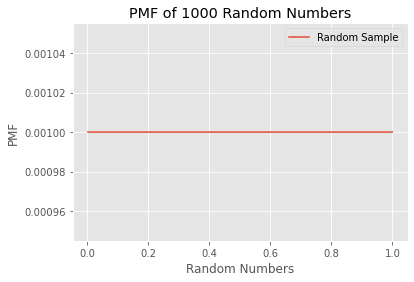

In [34]:
# create 1000 random numbers
random_sample = np.random.random(1000)

# create pmf of random_sample  - use empyrical_dist lib
random_pmf = Pmf.from_seq(random_sample)

# plot pmf
plt.style.use("ggplot")
plt.step(random_pmf.qs, random_pmf.ps, label="Random Sample")

# add labels
plt.title("PMF of 1000 Random Numbers")
plt.legend()
plt.xlabel("Random Numbers")
plt.ylabel("PMF")



Text(0.5, 1.0, 'CDF of 1000 Random Numbers')

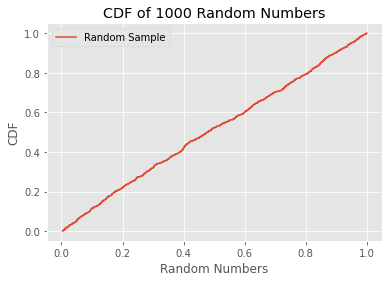

In [35]:
# create cdf of random_sample - use empyrical_dist lib
random_cdf = Cdf.from_seq(random_sample)

# plot cdf
plt.style.use("ggplot")
plt.step(random_cdf.qs, random_cdf.ps, label="Random Sample")

# add labels
plt.legend()
plt.xlabel("Random Numbers")
plt.ylabel("CDF")
plt.title("CDF of 1000 Random Numbers")



## Summary

The np.random.random gives a uniform distribution of numbers. This means that the CDF for the random number generation is a straight line, indicating the data is uniform.